QUESTION 1

Step 3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls


drive/  sample_data/


In [ ]:
import pandas as pd

In [ ]:
housing = pd.read_csv("housing-4 (1).csv")

QUESTION 2

Step 4a:

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


TASK 1:
20640

TASK 2:
total_bedrooms has missing values as it has only 20433.It has 207 missing values.It might be because of instances where the bedroom count was not available or not applicable.
The highlighted line has 20433 non-null entities while the others has 20640 entities.

TASK 3:

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


TASK 4:
LATITUDE
count = 20640.000000
mean = 35.631861
std = 2.135952
min = 32.540000
25% = 33.930000
50% = 34.260000
75% = 37.710000
max = 41.950000

QUESTION 3

STEP 4b:

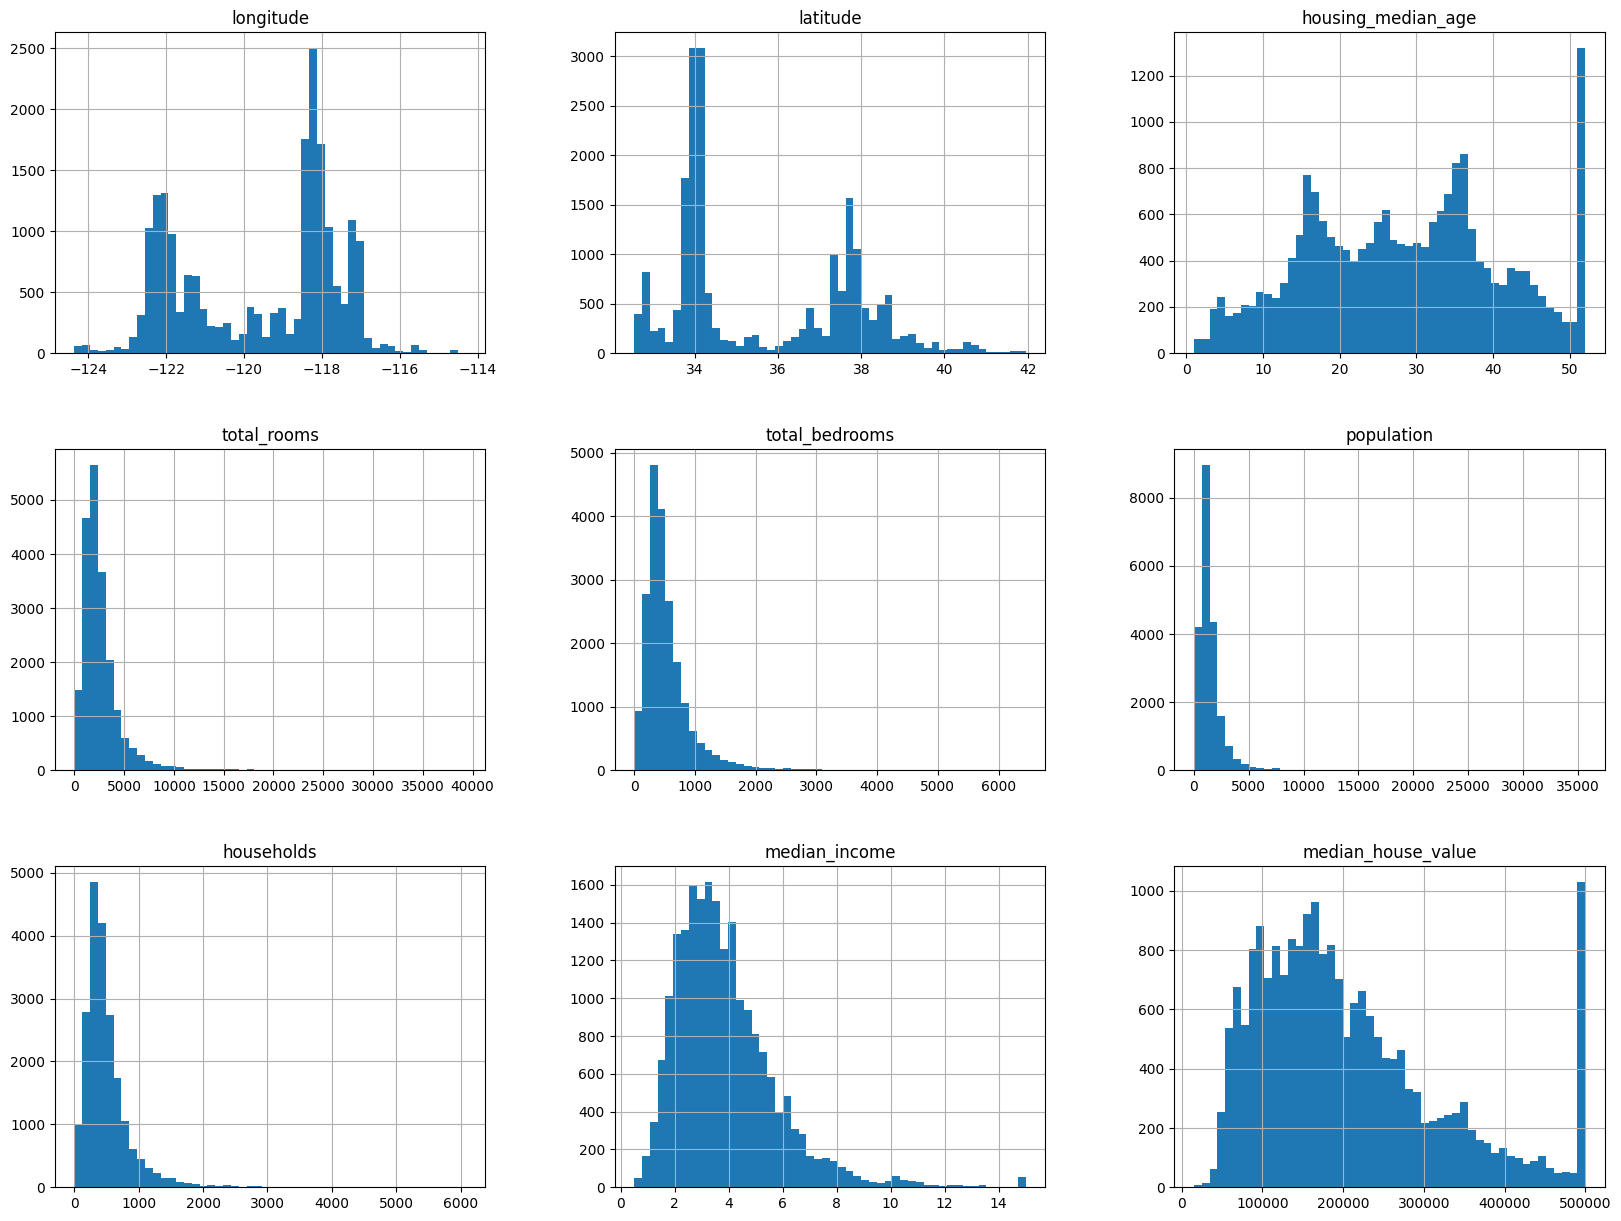

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

TASK 1:

Concern l:
Numerous machine learning methods, like PCA and One-class SVM, can function badly in situations when numerical attributes have vastly different scales.

Scaling each characteristic to a range of values between 0 and 1 is the process of normalization.
Standardization: Give each feature a mean of 0 and a standard deviation of 1.

Libraries like as scikit-learn and associated methods, such as MinMaxScaler and StandardScaler, can help achieve these changes.

Concern 2:
Features having skewed distributions, or tail-heavy features, might affect the model's performance and cause poor generalization.

Log Transformation: To lessen skewness, perform a log transformation.
Box-Cox Transformation: To make the data more regularly distributed, apply a Box-Cox transformation for non-negative values.
Winsorization: To lessen the effect of outliers, limit extreme values.

Concern 3:
Capped values have the ability to skew model learning by distorting the feature distribution. Models that treat capped values as valid data points run the risk of distorting the distribution of the underlying data.

Recognize the Cap: Ascertain the rationale behind the capped numbers. Use unlimited data if at all possible.
Imputation: Take into account imputing values based on the feature distribution if the capping is caused by sensor or measurement constraints.
Engineering Features: Make a second binary feature that indicates if or not the initial value was capped. This can assist the model in differentiating between capped and truly high numbers.


QUESTION 4

STEP 5a:

TASK 1:

In [ ]:
import numpy as np
import pandas as pd
np.random.seed(10)

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

housing = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Target': np.random.rand(100)
})

train_set, test_set = split_train_test(housing, 0.2)
train_set.head(), test_set.head()



(    Feature1  Feature2    Target
 33  0.319236  0.381412  0.538148
 48  0.325512  0.693890  0.988917
 62  0.534558  0.030685  0.458724
 74  0.346347  0.615737  0.113960
 35  0.300700  0.925357  0.122510,
     Feature1  Feature2    Target
 20  0.542544  0.218769  0.257475
 68  0.330719  0.838261  0.858649
 42  0.198948  0.561557  0.793273
 82  0.597837  0.174814  0.898024
 24  0.441833  0.469785  0.809892)

TASK 1:

In [ ]:
num_train_samples = train_set.shape[0]
num_test_samples = test_set.shape[0]
total_samples = housing.shape[0]
sum_samples = num_train_samples + num_test_samples
is_equal = sum_samples == total_samples
print(f"Number of samples in train set: {num_train_samples}")
print(f"Number of samples in test set: {num_test_samples}")
print(f"Total number of samples in the housing dataset: {total_samples}")
print(f"Sum of train and test samples equals total samples: {is_equal}")

Number of samples in train set: 80
Number of samples in test set: 20
Total number of samples in the housing dataset: 100
Sum of train and test samples equals total samples: True


TASK 2:
The function np.random.seed(42) can be used to set the seed of the NumPy random number generator. The seed controls the generated random number sequence's randomness and ensures consistency. When you wish consistent outcomes from various code runs, this aids in debugging, testing, and sharing your work with others. Reproducibility: You may ensure that the code generates the same random integers each time it runs by specifying the seed. As a result, your tests and conclusions can be repeated. Debugging: By enabling you to consistently duplicate the same random numbers and, hence, the same debugging conditions, it makes debugging easier. Consistency in Experiments: It ensures that experiments and results are consistent between runs so that models, parameters, and setups may be compared.

QUESTION 5

STEP 5b:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
seed = 42

np.random.seed(seed)

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

housing = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Target': np.random.rand(100)
})

train_set_custom, test_set_custom = split_train_test(housing, 0.2)

train_set_sklearn, test_set_sklearn = train_test_split(housing, test_size=0.2, random_state=seed)

train_custom_equal_sklearn = train_set_custom.reset_index(drop=True).equals(train_set_sklearn.reset_index(drop=True))
test_custom_equal_sklearn = test_set_custom.reset_index(drop=True).equals(test_set_sklearn.reset_index(drop=True))

print(f"Are the custom training set and sklearn training set the same? {train_custom_equal_sklearn}")
print(f"Are the custom testing set and sklearn testing set the same? {test_custom_equal_sklearn}")


Are the custom training set and sklearn training set the same? False
Are the custom testing set and sklearn testing set the same? False


TASK 1:
 This comparison will show. If not, it suggests that the internal randomization mechanisms have changed.

QUESTION 8

In [ ]:
import pandas as pd
file_path = '/content/housing-4 (1).csv'
train_set_clean = pd.read_csv(file_path)
train_labels = train_set_clean["median_house_value"].copy() # get labels for output label Y
train_features = train_set_clean.drop("median_house_value", axis=1) # drop labels to get features X for training set
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


TASK 2:

In [ ]:
size_of_training_instances = train_features.shape[0]
missing_values_detected = train_features.isnull().sum()
statistics_summary = train_features.describe()
print(f"Size of training instances: {size_of_training_instances}")
print(f"Any missing values detected:\n{missing_values_detected}")
print(f"Statistics summary:\n{statistics_summary}")

Size of training instances: 20640
Any missing values detected:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64
Statistics summary:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  media

TASK 3:

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64


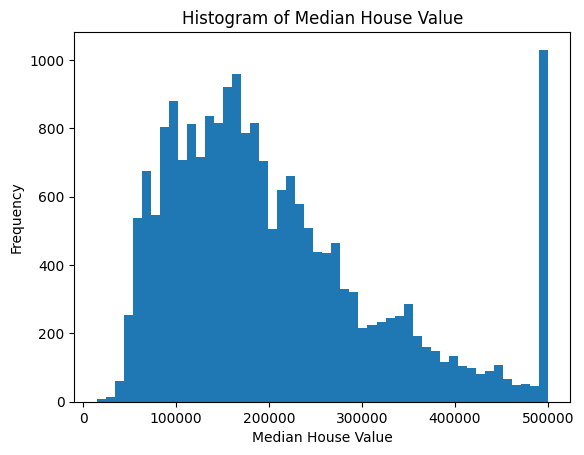

In [ ]:
import matplotlib.pyplot as plt
print(train_labels)
plt.hist(train_labels, bins=50)
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Histogram of Median House Value")
plt.show()

QUESTION 9

Step 9:

Min of each column:  [-124.35     32.54      1.        2.        1.        3.        1.
    0.4999]
Max of each column:  [-1.14310e+02  4.19500e+01  5.20000e+01  3.93200e+04  6.44500e+03
  3.56820e+04  6.08200e+03  1.50001e+01]


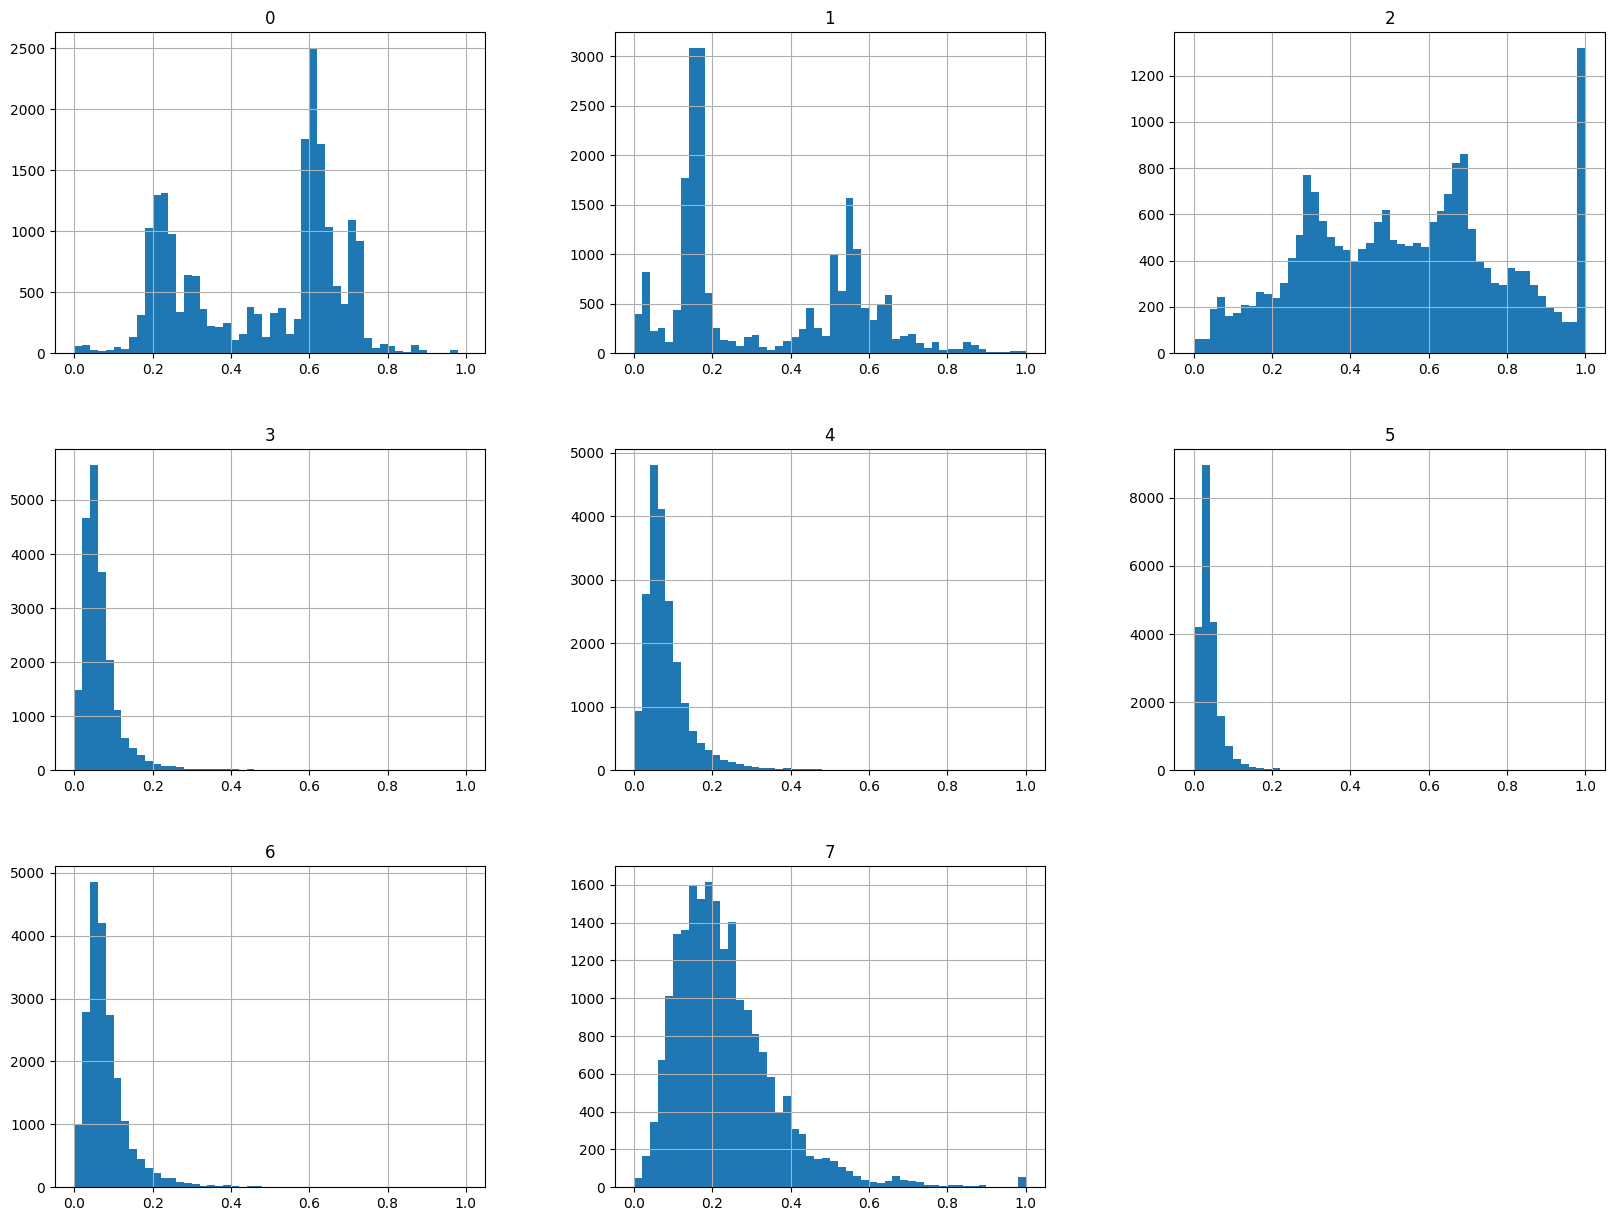

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() ## define the transformer
scaler.fit(train_features) ## call .fit() method to calculate the min and max value for each column in dataset
train_features_normalized = scaler.transform(train_features)
train_features_normalized
print("Min of each column: ",scaler.data_min_)
print("Max of each column: ",scaler.data_max_)
pd.DataFrame(train_features_normalized).hist(bins=50, figsize=(20,15))
plt.show()